<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


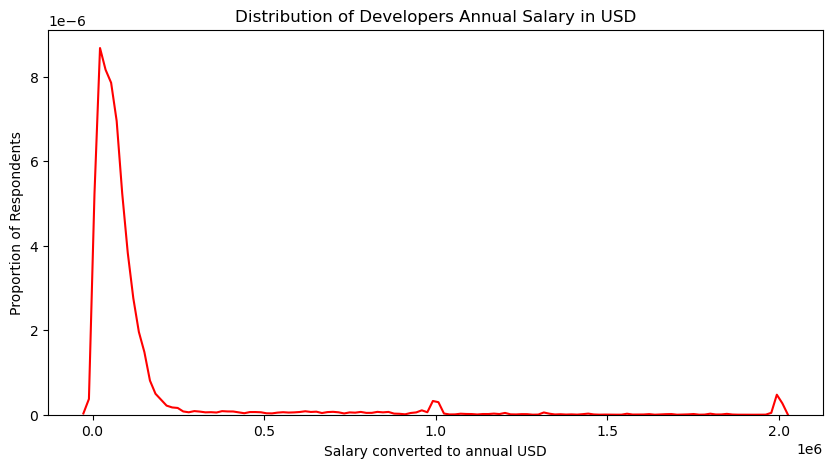

In [19]:
# your code goes here
df.dropna(subset=["ConvertedComp"], axis=0, inplace=True)
df['ConvertedComp'].value_counts()

plt.figure(figsize=(10,5))
sns.distplot(df['ConvertedComp'], hist=False, color="r")

plt.title('Distribution of Developers Annual Salary in USD')
plt.xlabel('Salary converted to annual USD')
plt.ylabel('Proportion of Respondents')

plt.show()

Plot the histogram for the column `ConvertedComp`.


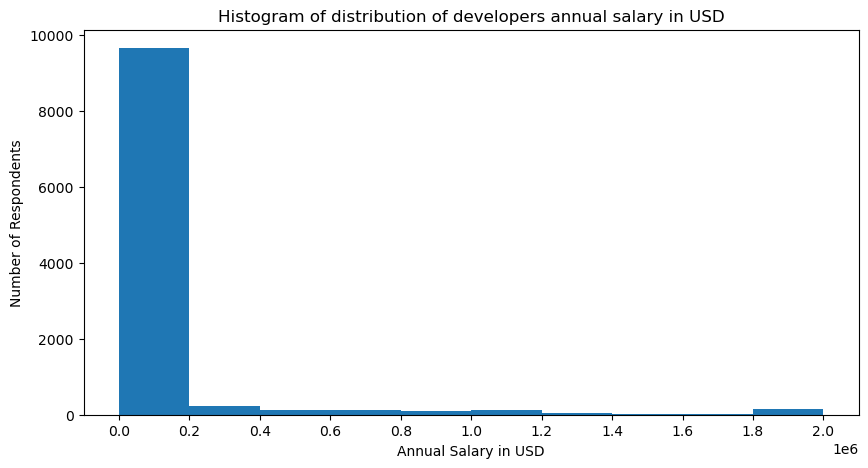

In [9]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])

df['ConvertedComp'].plot(kind='hist', figsize=(10, 5), xticks=bin_edges)

plt.title('Histogram of distribution of developers annual salary in USD')
plt.ylabel('Number of Respondents')
plt.xlabel('Annual Salary in USD') 

plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
df.dropna(subset=["Age"], axis=0, inplace=True)
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


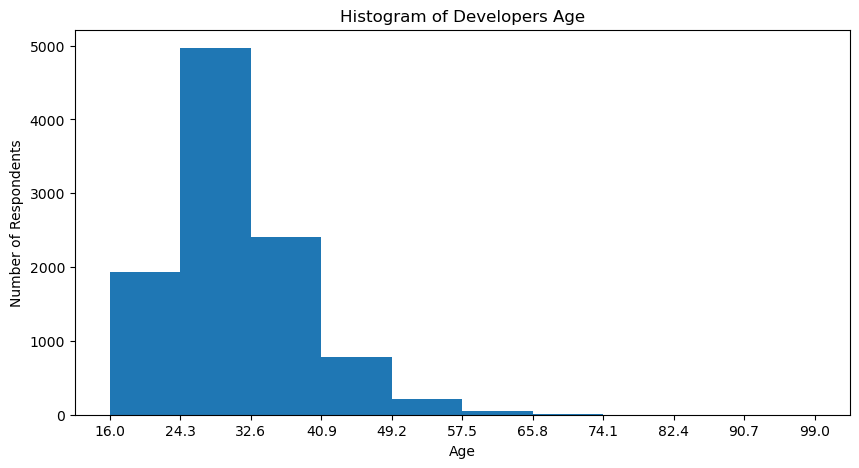

In [18]:
# your code goes here
count, bin_edges = np.histogram(df['Age'])

df['Age'].plot(kind='hist', figsize=(10,5), xticks=bin_edges)
plt.title("Histogram of Developers Age")
plt.ylabel("Number of Respondents")
plt.xlabel("Age")

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


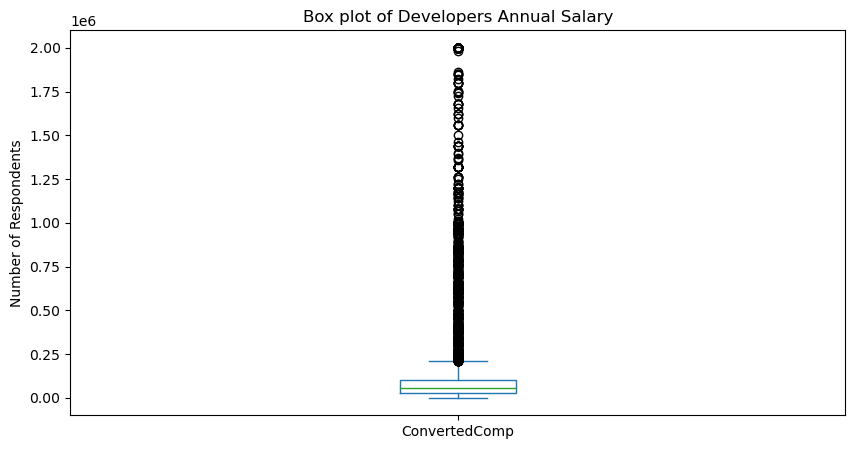

In [20]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,5))

plt.title('Box plot of Developers Annual Salary')
plt.ylabel('Number of Respondents')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# your code goes here

df['ConvertedComp'].describe()
IQR = df['ConvertedComp'].describe()[6] - df['ConvertedComp'].describe()[4]
IQR

73165.5

Find out the upper and lower bounds.


In [24]:
# your code goes here
IQR_V = 1.5 * IQR

lower = df['ConvertedComp'].describe()[4] - IQR_V
upper = df['ConvertedComp'].describe()[6] + IQR_V

print("Lower bound:" , lower)
print("Upper bound:" , upper)

Lower bound: -82913.75
Upper bound: 209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here

df[(df['ConvertedComp'] > upper) | (df['ConvertedComp'] < lower)].shape[0]


861

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# your code goes here
df_new = df[df['ConvertedComp'] <= upper]
df_new
df_new.median()
df_new.mean()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Respondent        12519.288844
CompTotal        732163.544190
ConvertedComp     59740.170441
WorkWeekHrs          41.895104
CodeRevHrs            4.717439
Age                  30.695860
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
df_new.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019281,0.010916,-0.017491,0.004692,0.002180
CompTotal,-0.019281,1.000000,-0.063574,0.004667,0.015992,0.006337
ConvertedComp,0.010916,-0.063574,1.000000,0.033110,-0.086527,0.401821
WorkWeekHrs,-0.017491,0.004667,0.033110,1.000000,0.038948,0.032032
CodeRevHrs,0.004692,0.015992,-0.086527,0.038948,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
